In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('combined_data.csv')

In [5]:
df.sample(5)

,label,text
76558,1,if the only thing standing between you and a l...
31245,0,hi metze metze samba org wrote author metze da...
72133,0,can anyone recommend a command line instant me...
22425,0,"new power plant added to pnm system\npnm , pub..."
36050,0,on tue may escapenumber escapenumber at escape...


In [6]:
df.shape

(83448, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [8]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [24]:
df.duplicated().sum()

0

EDA

In [13]:
df['label'].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

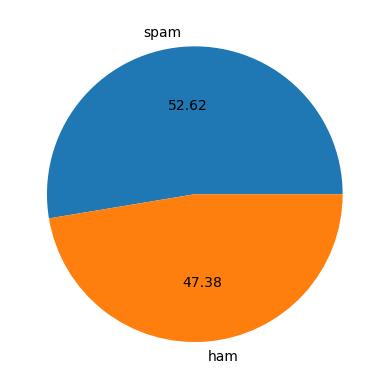

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels = ['spam', 'ham'], autopct = "%0.2f")
plt.show()

In [19]:
import nltk

In [28]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bisht\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [21]:
df['num_characters'] = df['text'].apply(len)

In [23]:
df.head()

,label,text,num_characters
0,1,ounce feather bowl hummingbird opec moment ala...,148
1,1,wulvob get your medircations online qnb ikud v...,808
2,0,computer connection from cnn com wednesday es...,2235
3,1,university degree obtain a prosperous future m...,592
4,0,thanks for all your answers guys i know i shou...,1362


In [30]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [31]:
df.head()

,label,text,num_characters,num_words
0,1,ounce feather bowl hummingbird opec moment ala...,148,20
1,1,wulvob get your medircations online qnb ikud v...,808,104
2,0,computer connection from cnn com wednesday es...,2235,338
3,1,university degree obtain a prosperous future m...,592,76
4,0,thanks for all your answers guys i know i shou...,1362,223


In [32]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,label,text,num_characters,num_words,num_sentences
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,1
1,1,wulvob get your medircations online qnb ikud v...,808,104,1
2,0,computer connection from cnn com wednesday es...,2235,338,1
3,1,university degree obtain a prosperous future m...,592,76,1
4,0,thanks for all your answers guys i know i shou...,1362,223,1


In [34]:
df.sample(5)

,label,text,num_characters,num_words,num_sentences
54225,1,"lncrease sperm volume , and orgasm length\nmaj...",269,50,3
26195,1,% words % words % words % words\ndle ! a ; rcu...,228,61,2
50027,0,john,4,1,1
16584,1,"hello , welcome to phar seethe monline sh klys...",423,78,2
22893,1,things in order meg helped jo clear away the r...,3110,575,1
